In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_excel("C:\\Users\\USER\\Downloads\\archive (9)\\Global Superstore.xls")
df

Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       32298   CA-2012-124891 2012-07-31 2012-07-31        Same Day   
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
2       25330    IN-2013-71249 2013-10-17 2013-10-18     First Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
4       47221     SG-2013-4320 2013-11-05 2013-11-06        Same Day   
...       ...              ...        ...        ...             ...   
51285   29002    IN-2014-62366 2014-06-19 2014-06-19        Same Day   
51286   35398   US-2014-102288 2014-06-20 2014-06-24  Standard Class   
51287   40470   US-2013-155768 2013-12-02 2013-12-02        Same Day   
51288    9596   MX-2012-140767 2012-02-18 2012-02-22  Standard Class   
51289    6147   MX-2012-134460 2012-05-22 2012-05-26    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845        933.570        Critical  
1          0.1 -288.7650        923.630        Critical  
2          0.1  919.9710        915.490          Medium  
3          0.1  -96.5400        910.160          Medium  
4          0.0  311.5200        903.040        Critical  
...        ...       ...            ...             ...  
51285      0.0    4.5000         

In [3]:
df.shape

(51290, 24)

In [4]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [6]:
df = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code', 'Product ID'], axis=1)

In [7]:
df.head()

Order Date  Ship Date     Ship Mode     Customer Name      Segment  \
0 2012-07-31 2012-07-31      Same Day       Rick Hansen     Consumer   
1 2013-02-05 2013-02-07  Second Class     Justin Ritter    Corporate   
2 2013-10-17 2013-10-18   First Class      Craig Reiter     Consumer   
3 2013-01-28 2013-01-30   First Class  Katherine Murray  Home Office   
4 2013-11-05 2013-11-06      Same Day       Rick Hansen     Consumer   

            City            State        Country  Market   Region    Category  \
0  New York City         New York  United States      US     East  Technology   
1     Wollongong  New South Wales      Australia    APAC  Oceania   Furniture   
2       Brisbane       Queensland      Australia    APAC  Oceania  Technology   
3         Berlin           Berlin        Germany      EU  Central  Technology   
4          Dakar            Dakar        Senegal  Africa   Africa  Technology   

  Sub-Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9       0.1 -288.7650         923.63       Critical  
2         9       0.1  919.9710         915.49         Medium  
3         5       0.1  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [8]:
df.duplicated().sum()

0

In [9]:
(df.isnull().sum()/len(df)*100)

Order Date        0.0
Ship Date         0.0
Ship Mode         0.0
Customer Name     0.0
Segment           0.0
City              0.0
State             0.0
Country           0.0
Market            0.0
Region            0.0
Category          0.0
Sub-Category      0.0
Product Name      0.0
Sales             0.0
Quantity          0.0
Discount          0.0
Profit            0.0
Shipping Cost     0.0
Order Priority    0.0
dtype: float64

In [10]:
df['Discount'] = df.Discount*100

In [11]:
df

Order Date  Ship Date       Ship Mode     Customer Name      Segment  \
0     2012-07-31 2012-07-31        Same Day       Rick Hansen     Consumer   
1     2013-02-05 2013-02-07    Second Class     Justin Ritter    Corporate   
2     2013-10-17 2013-10-18     First Class      Craig Reiter     Consumer   
3     2013-01-28 2013-01-30     First Class  Katherine Murray  Home Office   
4     2013-11-05 2013-11-06        Same Day       Rick Hansen     Consumer   
...          ...        ...             ...               ...          ...   
51285 2014-06-19 2014-06-19        Same Day   Katrina Edelman    Corporate   
51286 2014-06-20 2014-06-24  Standard Class  Zuschuss Carroll     Consumer   
51287 2013-12-02 2013-12-02        Same Day    Laurel Beltran  Home Office   
51288 2012-02-18 2012-02-22  Standard Class        Ross Baird  Home Office   
51289 2012-05-22 2012-05-26    Second Class     Mick Crebagga     Consumer   

                City            State        Country  Market      Region  \
0      New York City         New York  United States      US        East   
1         Wollongong  New South Wales      Australia    APAC     Oceania   
2           Brisbane       Queensland      Australia    APAC     Oceania   
3             Berlin           Berlin        Germany      EU     Central   
4              Dakar            Dakar        Senegal  Africa      Africa   
...              ...              ...            ...     ...         ...   
51285           Kure        Hiroshima          Japan    APAC  North Asia   
51286        Houston            Texas  United States      US     Central   
51287         Oxnard       California  United States      US        West   
51288       Valinhos        São Paulo         Brazil   LATAM       South   
51289       Tipitapa          Managua      Nicaragua   LATAM     Central   

              Category Sub-Category  \
0           Technology  Accessories   
1            Furniture       Chairs   
2           Technology       Phones   
3           Technology       Phones   
4           Technology      Copiers   
...                ...          ...   
51285  Office Supplies    Fasteners   
51286  Office Supplies   Appliances   
51287  Office Supplies    Envelopes   
51288  Office Supplies      Binders   
51289  Office Supplies        Paper   

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920         3   
51288                            Acco Index Tab, Economy    13.440         2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380         3   

       Discount    Profit  Shipping Cost Order Priority  
0           0.0  762.1845        933.570       Critical  
1          10.0 -288.7650        923.630       Critical  
2          10.0  919.9710        915.490         Medium  
3          10.0  -96.5400        910.160         Medium  
4           0.0  311.5200        903.040       Critical  
...         ...       ...            ...            ...  
51285       0.0    4.5000          0.010         Medium  
51286      80.0   -1.1100          0.010         Medium  
51287       0.0   11.2308          0.010           High  
51288       0.0    2.4000          0.003         Medium  
51289       0.0    1.8000          0.002           High  

[51290 rows x 19 columns]

In [12]:
City = df['City'].value_counts(ascending=False)
City.head()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Name: City, dtype: int64

In [13]:
City_lessthan_100 = City[City<100]
City_lessthan_100

Newark                        95
Geelong                       94
Richmond                      94
Izmir                         93
Santiago de los Caballeros    93
                              ..
Vesoul                         1
Várzea Grande                  1
Luanshya                       1
Kissimmee                      1
Victoria Falls                 1
Name: City, Length: 3561, dtype: int64

In [14]:
pd.set_option('display.max_row',75)
def handle_City(value):
    if (value in City_lessthan_100):
        pass
    else:
        return value
        
df['City'] = df['City'].apply(handle_City)
df['City'].value_counts()

New York City       915
Los Angeles         747
Philadelphia        537
San Francisco       510
Santo Domingo       443
Manila              432
Seattle             428
Houston             377
Tegucigalpa         362
Jakarta             337
Managua             336
Lagos               333
Chicago             314
Istanbul            314
Mexico City         300
Bangkok             287
London              281
Sydney              271
Cairo               248
Vienna              245
Melbourne           235
Columbus            222
San Salvador        221
Berlin              217
Gold Coast          201
Perth               198
Paris               187
Buenos Aires        184
Kinshasa            182
Ho Chi Minh City    179
Brisbane            178
Baghdad             173
San Pedro Sula      171
Madrid              171
San Diego           170
Springfield         163
Canberra            162
Adelaide            158
Dallas              157
Panama City         156
Riyadh              151
São Paulo       

In [15]:
State = df.State.value_counts()
State_lessthan_100 = State[State<300]

def handle_State(value):
    if (value in State_lessthan_100):
        pass
    else:
        return (value)

df['State'] = df['State'].apply(handle_State)
df['State'].value_counts()

California                    2001
England                       1499
New York                      1128
Texas                          985
Ile-de-France                  981
New South Wales                781
North Rhine-Westphalia         719
Queensland                     717
San Salvador                   615
Pennsylvania                   587
National Capital               583
Washington                     506
Illinois                       492
Victoria                       491
Ohio                           469
Distrito Federal               469
Santo Domingo                  443
Istanbul                       425
São Paulo                      409
Guatemala                      391
Provence-Alpes-Côte d'Azur     390
Florida                        383
Managua                        368
Francisco Morazán              362
Jakarta                        337
Lagos                          333
Panama                         325
Western Australia              312
Name: State, dtype: 

In [16]:
Country = df.Country.value_counts()
Country_lessthan_400 = Country[Country<400]

def handle_Country(x):
    if (x in Country_lessthan_400):
        pass
    else:
        return(x)
    
df['Country'] = df['Country'].apply(handle_Country)
df['Country'].value_counts()

United States         9994
Australia             2837
France                2827
Mexico                2644
Germany               2065
China                 1880
United Kingdom        1633
Brazil                1599
India                 1555
Indonesia             1390
Turkey                1378
Italy                 1108
Nigeria                905
Spain                  859
Dominican Republic     742
El Salvador            736
Cuba                   724
Honduras               713
Philippines            681
New Zealand            628
Nicaragua              614
Iran                   607
Guatemala              521
Egypt                  487
South Africa           461
Morocco                451
Netherlands            435
Name: Country, dtype: int64

In [17]:
Region = df['Region'].value_counts(ascending  = False)
Region_less_than100=Region[Region<100]

def handle_Region(value):
    if(value in Region_less_than100):
        return 'others'
    else:
        return value
        
df['Region'] = df['Region'].apply(handle_Region)
df['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [18]:
Market = df.Market.value_counts()
Market

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [19]:
Category = df.Category.value_counts()
Category

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [20]:
Sub_Category = df.rename(columns={'Sub-Category':'Sub_Category'}, inplace=True)
df.head()

Order Date  Ship Date     Ship Mode     Customer Name      Segment  \
0 2012-07-31 2012-07-31      Same Day       Rick Hansen     Consumer   
1 2013-02-05 2013-02-07  Second Class     Justin Ritter    Corporate   
2 2013-10-17 2013-10-18   First Class      Craig Reiter     Consumer   
3 2013-01-28 2013-01-30   First Class  Katherine Murray  Home Office   
4 2013-11-05 2013-11-06      Same Day       Rick Hansen     Consumer   

            City            State        Country  Market   Region    Category  \
0  New York City         New York  United States      US     East  Technology   
1     Wollongong  New South Wales      Australia    APAC  Oceania   Furniture   
2       Brisbane       Queensland      Australia    APAC  Oceania  Technology   
3         Berlin             None        Germany      EU  Central  Technology   
4           None             None           None  Africa   Africa  Technology   

  Sub_Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9      10.0 -288.7650         923.63       Critical  
2         9      10.0  919.9710         915.49         Medium  
3         5      10.0  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [21]:
Sub_Category = df.Sub_Category.value_counts()
Order_Priority = df['Order Priority'].value_counts()

In [22]:
Profit_sales = df.groupby('Sub_Category')['Sales','Profit','Discount','Category']
Profit_sales.first()

C:\Users\USER\AppData\Local\Temp\ipykernel_13956\581627528.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Profit_sales = df.groupby('Sub_Category')['Sales','Profit','Discount','Category']


Sales     Profit  Discount         Category
Sub_Category                                                
Accessories   2309.650   762.1845       0.0       Technology
Appliances    3701.520  1036.0800       0.0  Office Supplies
Art            439.680   153.8400       0.0  Office Supplies
Binders       5083.960  1906.4850      20.0  Office Supplies
Bookcases     5667.870  2097.0300       0.0        Furniture
Chairs        3709.395  -288.7650      10.0        Furniture
Copiers       2832.960   311.5200       0.0       Technology
Envelopes      361.584   -16.1760      10.0  Office Supplies
Fasteners      199.080    65.5200       0.0  Office Supplies
Furnishings    756.800    75.6800       0.0        Furniture
Labels         491.550   240.8595       0.0  Office Supplies
Machines      2402.865   763.1550      15.0       Technology
Paper          629.100   301.9680       0.0  Office Supplies
Phones        5175.171   919.9710      10.0       Technology
Storage       1261.330   327.9458       0.0  Office Supplies
Supplies      4164.050    83.2810       0.0  Office Supplies
Tables        5244.840   996.4800       0.0        Furniture

In [23]:
Profit_sales.sum().round(2)

C:\Users\USER\AppData\Local\Temp\ipykernel_13956\2407966196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Profit_sales.sum().round(2)


Sales     Profit  Discount
Sub_Category                                 
Accessories    749237.02  129626.31   37048.0
Appliances    1011064.30  141680.59   24870.0
Art            372091.97   57953.91   57308.0
Binders        461911.51   72449.85  110248.0
Bookcases     1466572.24  161924.42   37071.0
Chairs        1501681.76  140396.27   56012.0
Copiers       1509436.27  258567.55   26041.8
Envelopes      170904.30   29601.12   32081.0
Fasteners       83242.32   11525.42   34024.0
Furnishings    385578.26   46967.43   47888.0
Labels          73404.03   15010.51   31389.0
Machines       779060.07   58867.87   25200.0
Paper          244291.72   59207.68   38730.0
Phones        1706824.14  216717.01   48961.0
Storage       1127085.86  108461.49   70049.0
Supplies       243074.22   22583.26   31020.0
Tables         757041.92  -64083.39   25032.0

In [24]:
df.head()

Order Date  Ship Date     Ship Mode     Customer Name      Segment  \
0 2012-07-31 2012-07-31      Same Day       Rick Hansen     Consumer   
1 2013-02-05 2013-02-07  Second Class     Justin Ritter    Corporate   
2 2013-10-17 2013-10-18   First Class      Craig Reiter     Consumer   
3 2013-01-28 2013-01-30   First Class  Katherine Murray  Home Office   
4 2013-11-05 2013-11-06      Same Day       Rick Hansen     Consumer   

            City            State        Country  Market   Region    Category  \
0  New York City         New York  United States      US     East  Technology   
1     Wollongong  New South Wales      Australia    APAC  Oceania   Furniture   
2       Brisbane       Queensland      Australia    APAC  Oceania  Technology   
3         Berlin             None        Germany      EU  Central  Technology   
4           None             None           None  Africa   Africa  Technology   

  Sub_Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9      10.0 -288.7650         923.63       Critical  
2         9      10.0  919.9710         915.49         Medium  
3         5      10.0  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [25]:
df.to_csv('Clean_df.csv')

In [26]:
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [27]:
label = df['Ship Mode'].value_counts().keys().to_list()
label
values = df['Ship Mode'].value_counts().to_list()
values

fig = px.pie(df, values=values, names=label, hole=.3)
fig.show()

In [28]:
for x in df.Segment.unique():
    print (x)

for y in df.Segment.value_counts():
    print(y)
    
label = df['Segment'].value_counts().keys().to_list()
label

values = df['Segment'].value_counts().to_list()
values

fig = px.pie(df, values=values, names=label, hole=.3)
fig.show()

Consumer
Corporate
Home Office
26518
15429
9343


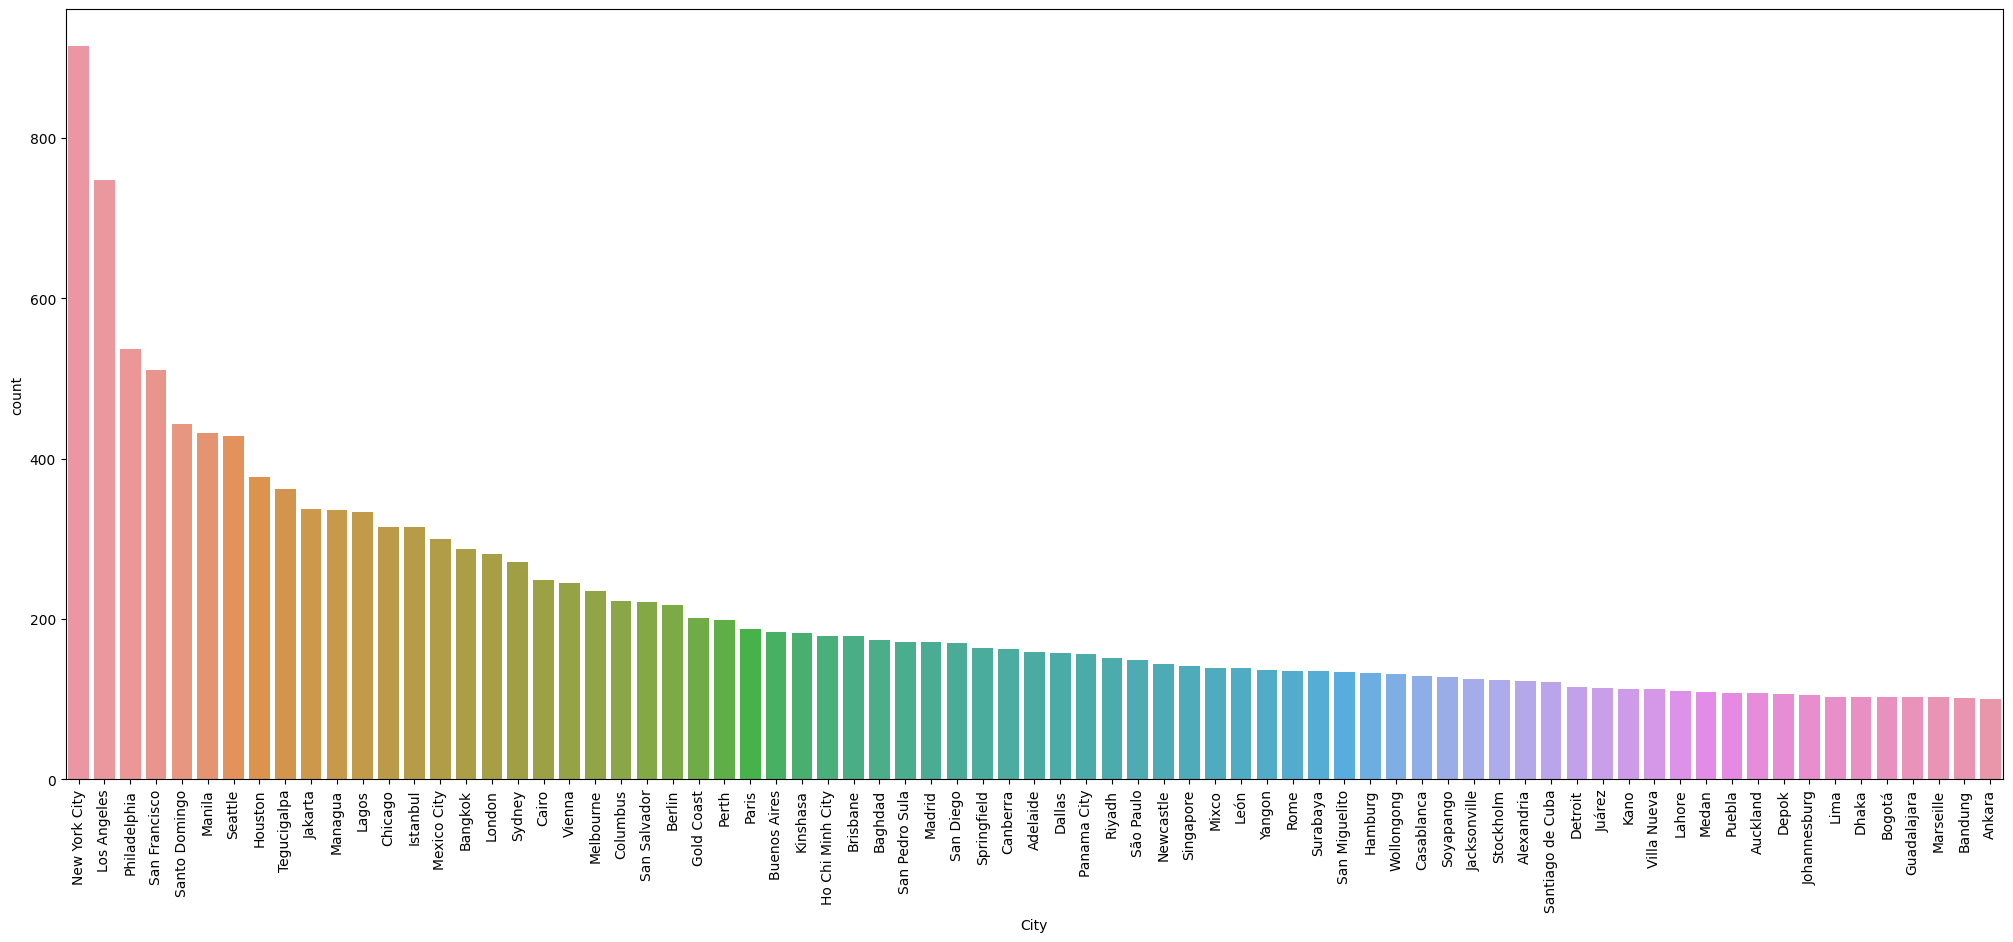

In [29]:
plt.figure(figsize=(25,10))
sns.countplot(df, x='City', order=df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

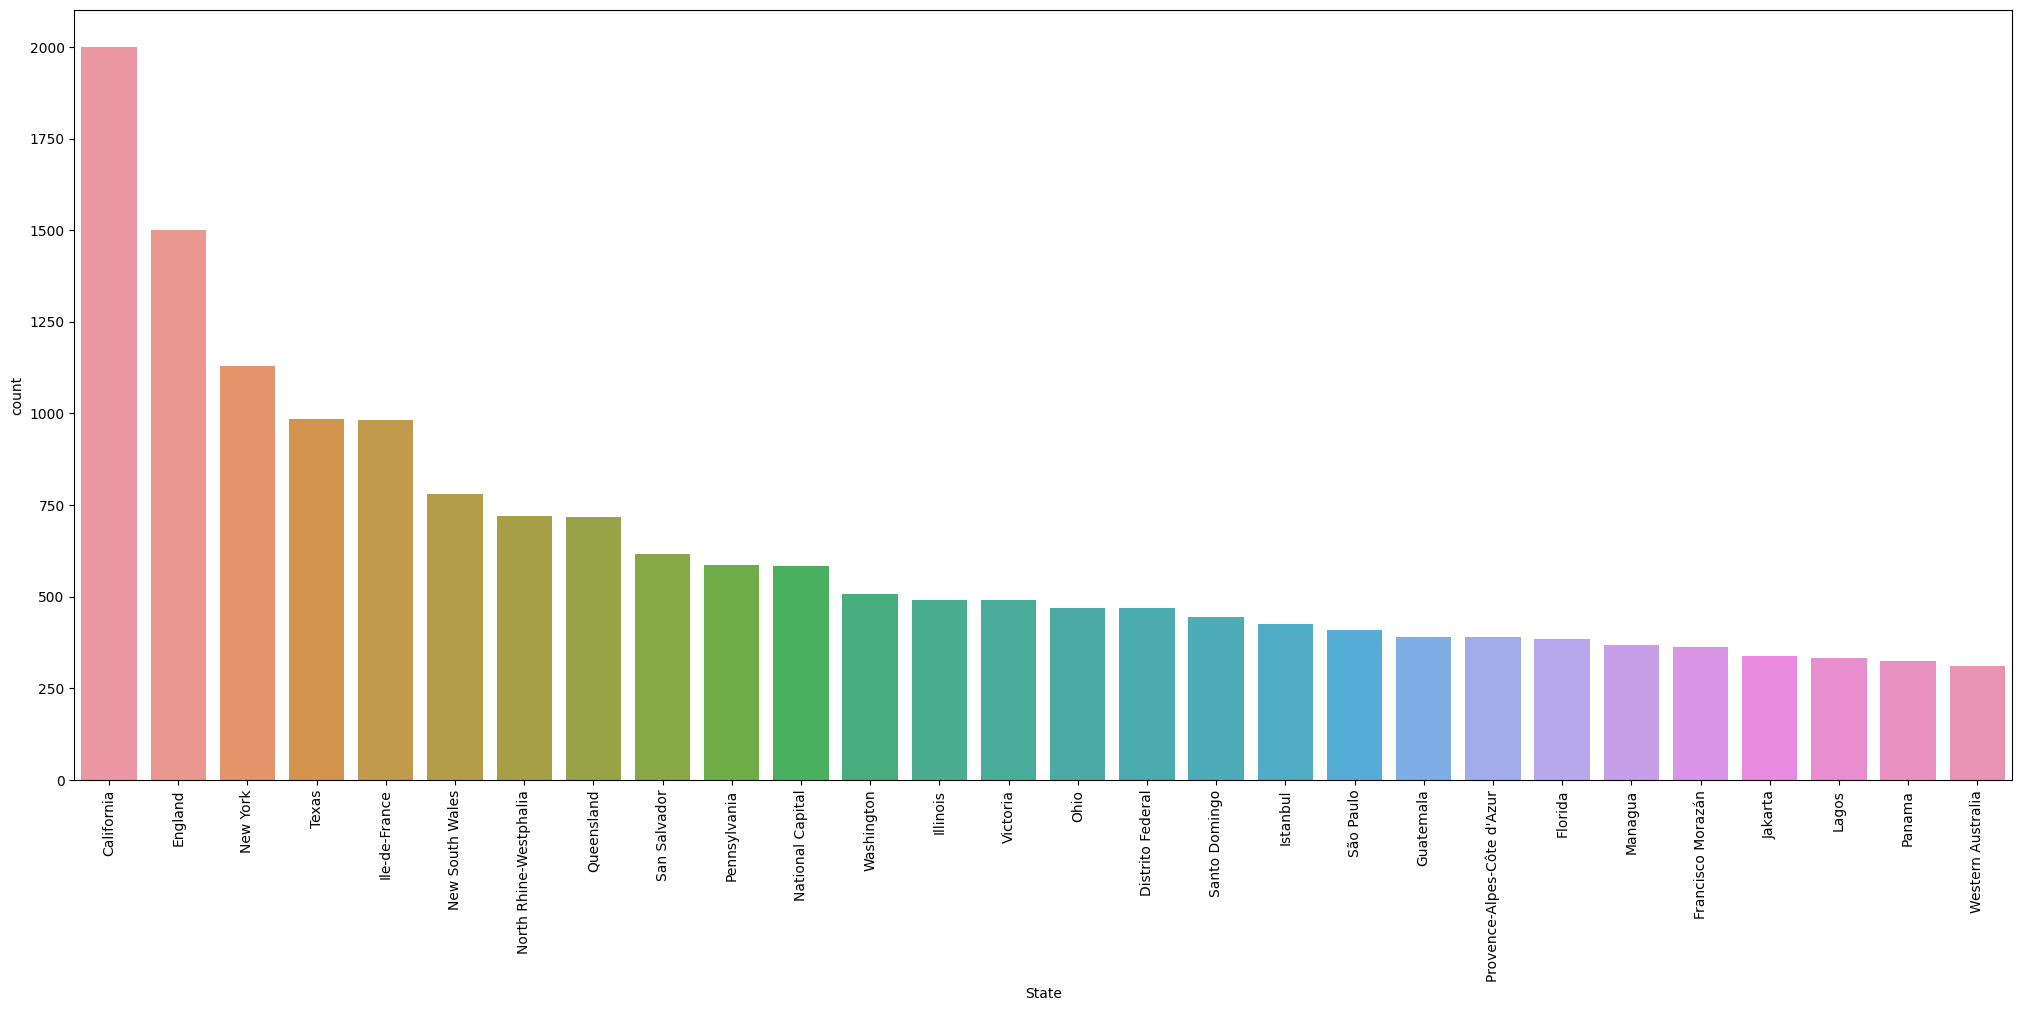

In [30]:
plt.figure(figsize=(25,10))
sns.countplot(df, x='State', order=df.State.value_counts().index)
plt.xticks(rotation=90)
plt.show()

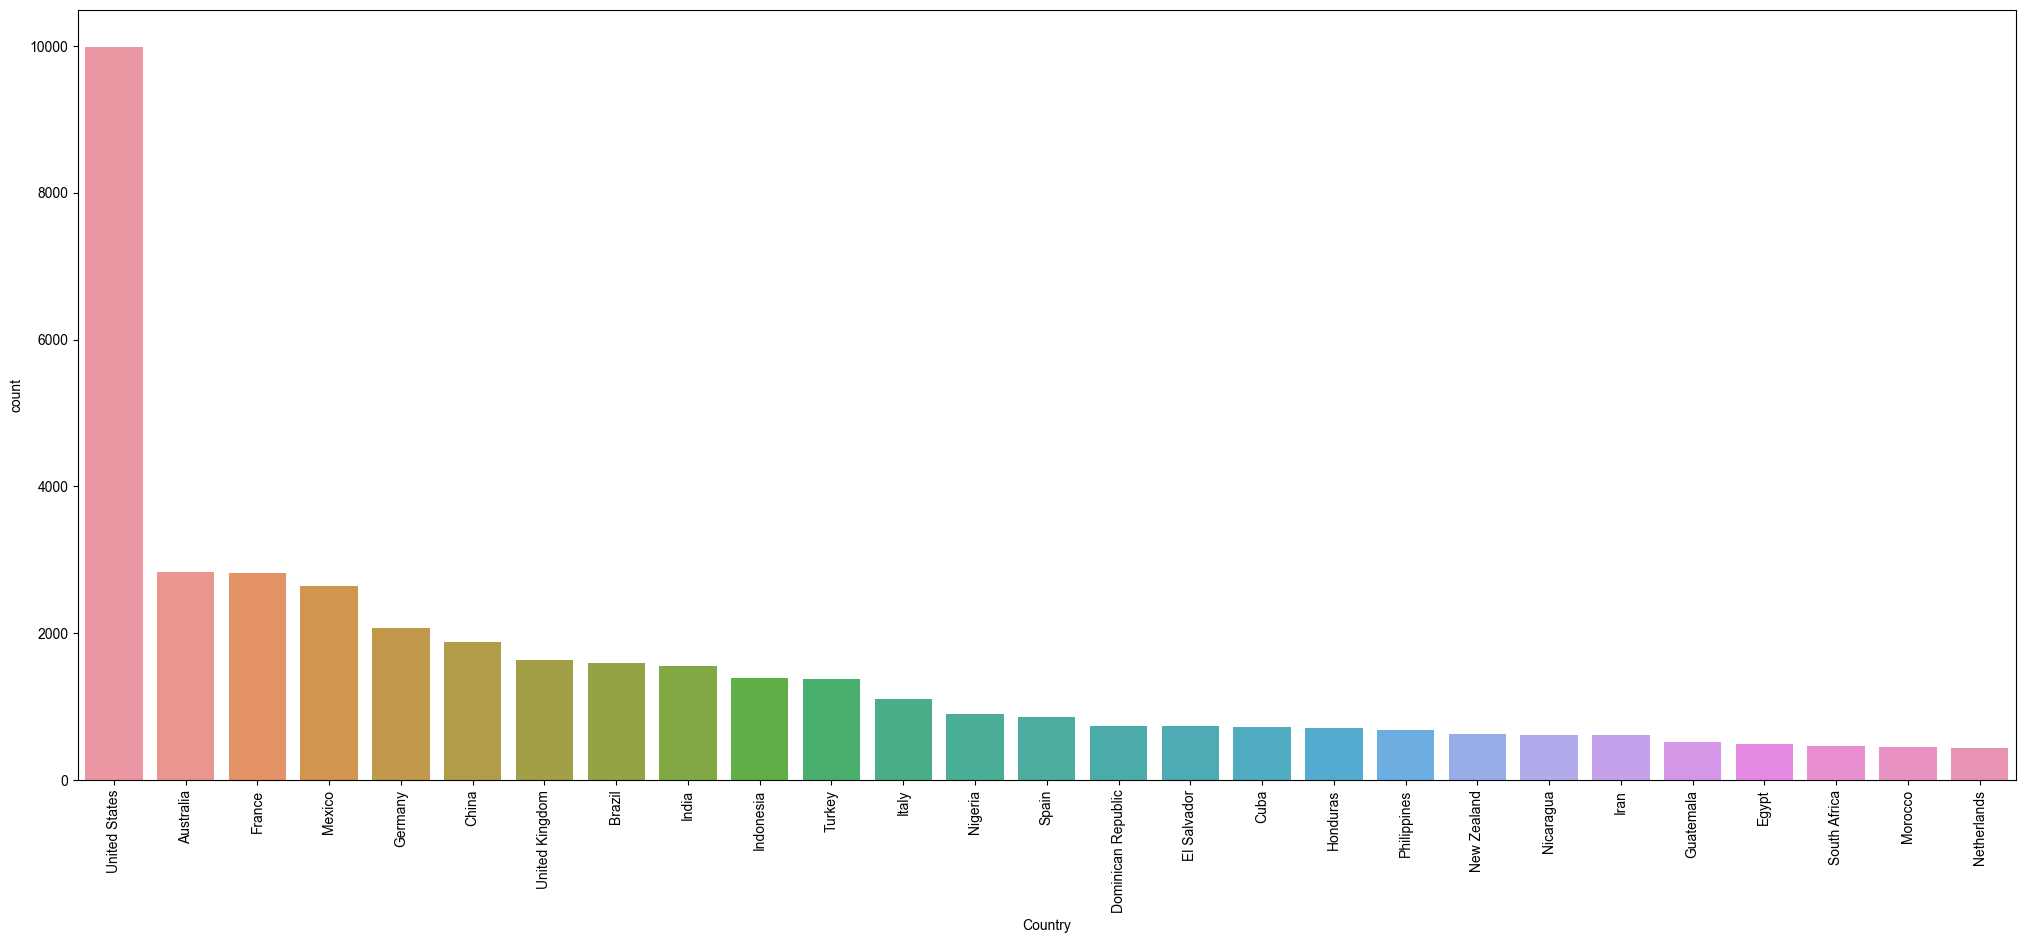

In [31]:
plt.figure(figsize=(25,10))
sns.countplot(df, x='Country', order=df.Country.value_counts().index)
sns.set(font_scale=1.0)
plt.xticks(rotation=90)
plt.show()

In [32]:
label = df['Country'].value_counts().keys().to_list()
label
values = df['Country'].value_counts().to_list()
values

fig = px.pie(df, values=values, names=label, hole=.1)
fig.show()

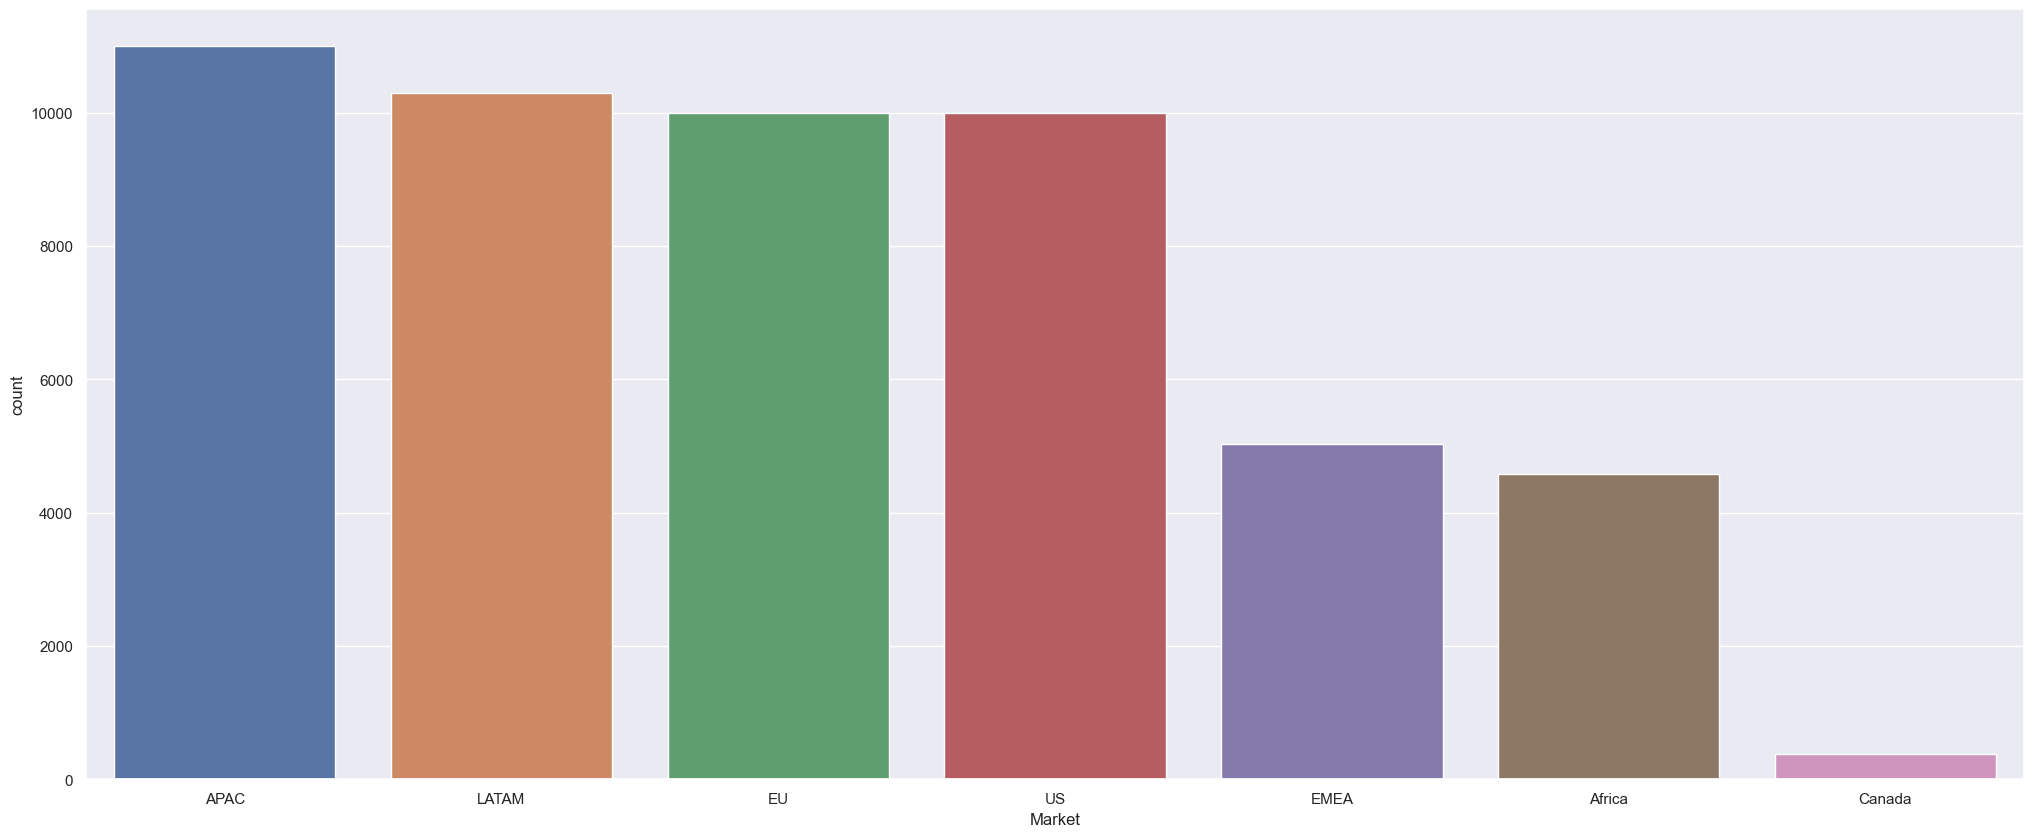

In [33]:
plt.figure(figsize=(25,10))
fig = sns.countplot(df, x='Market', order=df.Market.value_counts().index)
sns.set(font_scale=1.0)
plt.show()

In [34]:
label = df['Market'].value_counts().keys().to_list()
label
values = df['Market'].value_counts().to_list()
values

fig = px.pie(df, values=values, names=label, hole=.3)
fig.show()

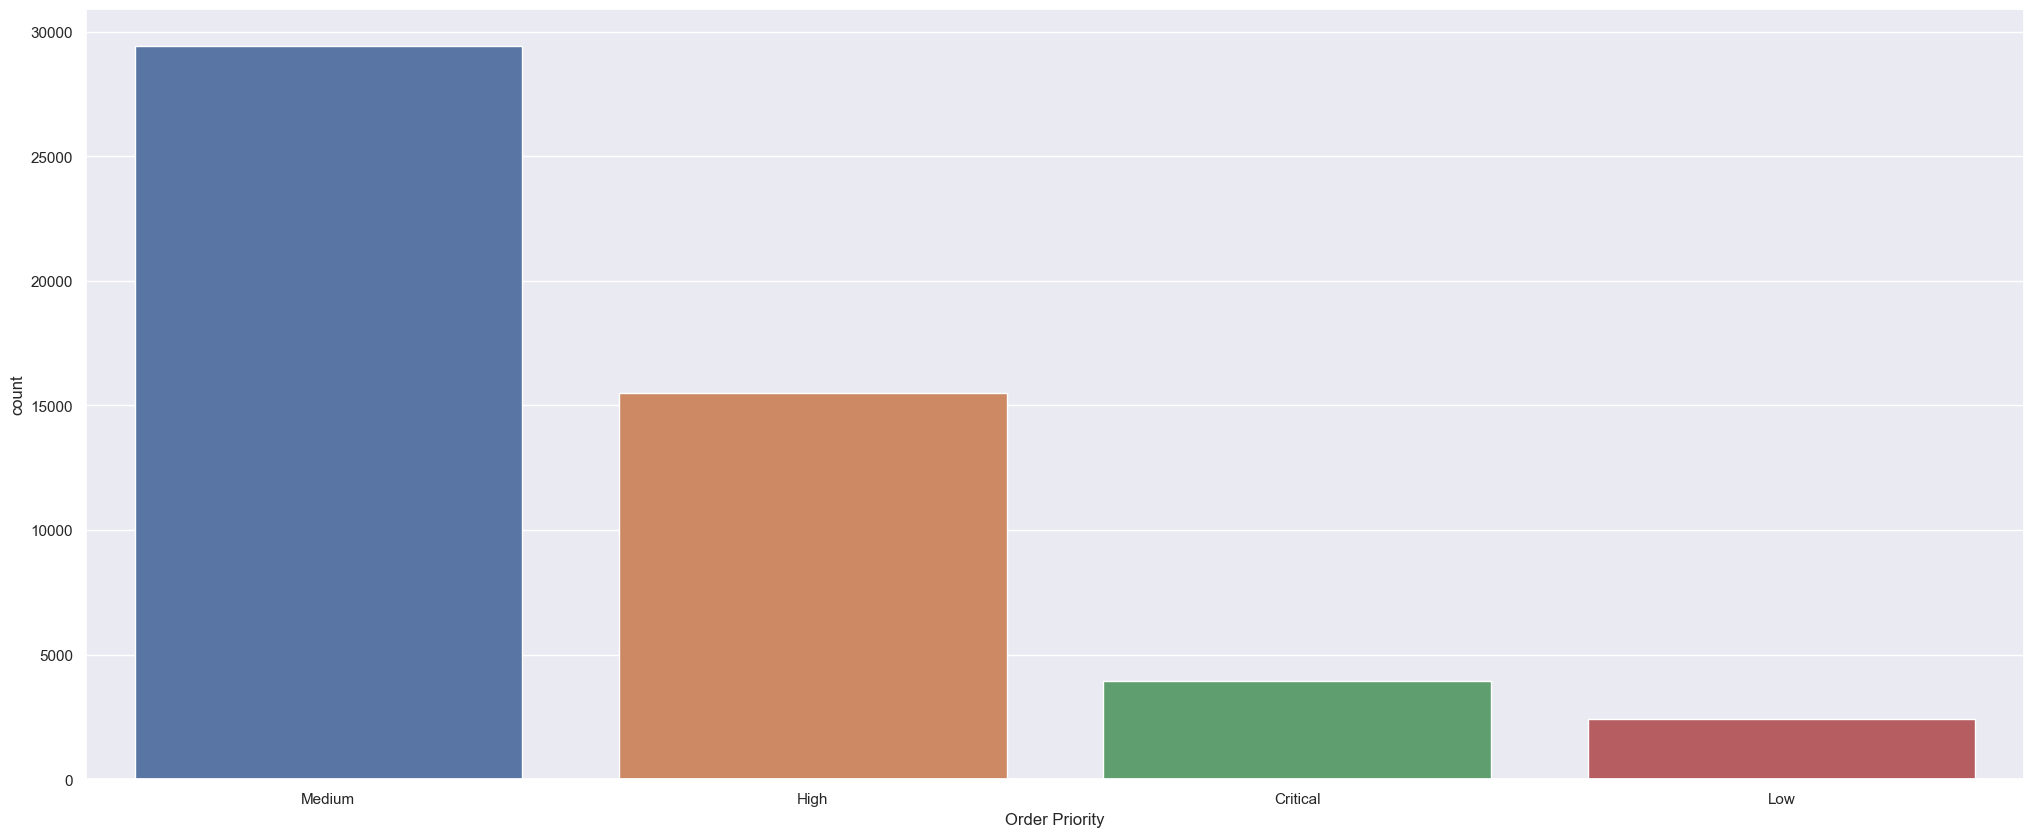

In [35]:
plt.figure(figsize=(25,10))
sns.countplot(df, x='Order Priority', order=df['Order Priority'].value_counts().index)
sns.set(font_scale=2.5)
plt.show()

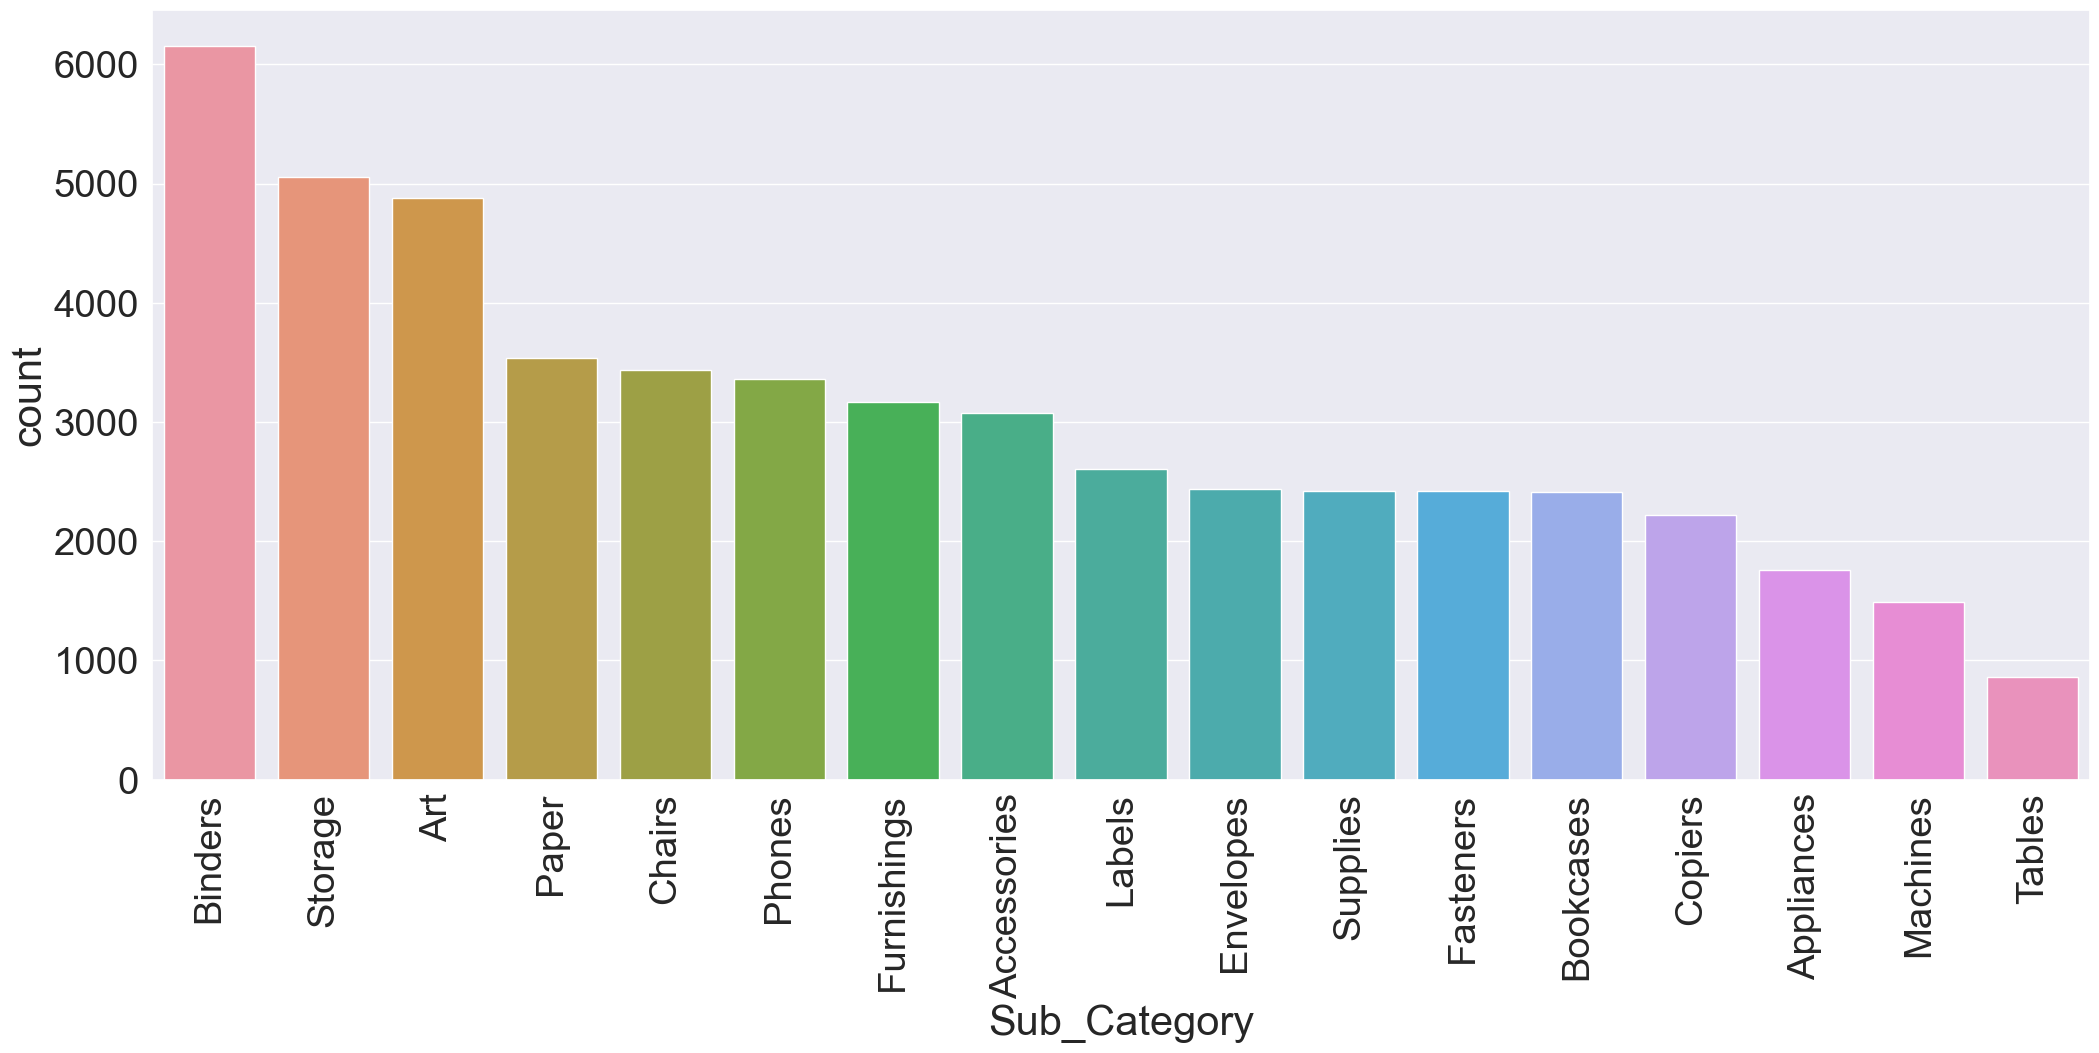

In [36]:
plt.figure(figsize=(25,10))
sns.countplot(df, x='Sub_Category', order=df['Sub_Category'].value_counts().index)
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.show()

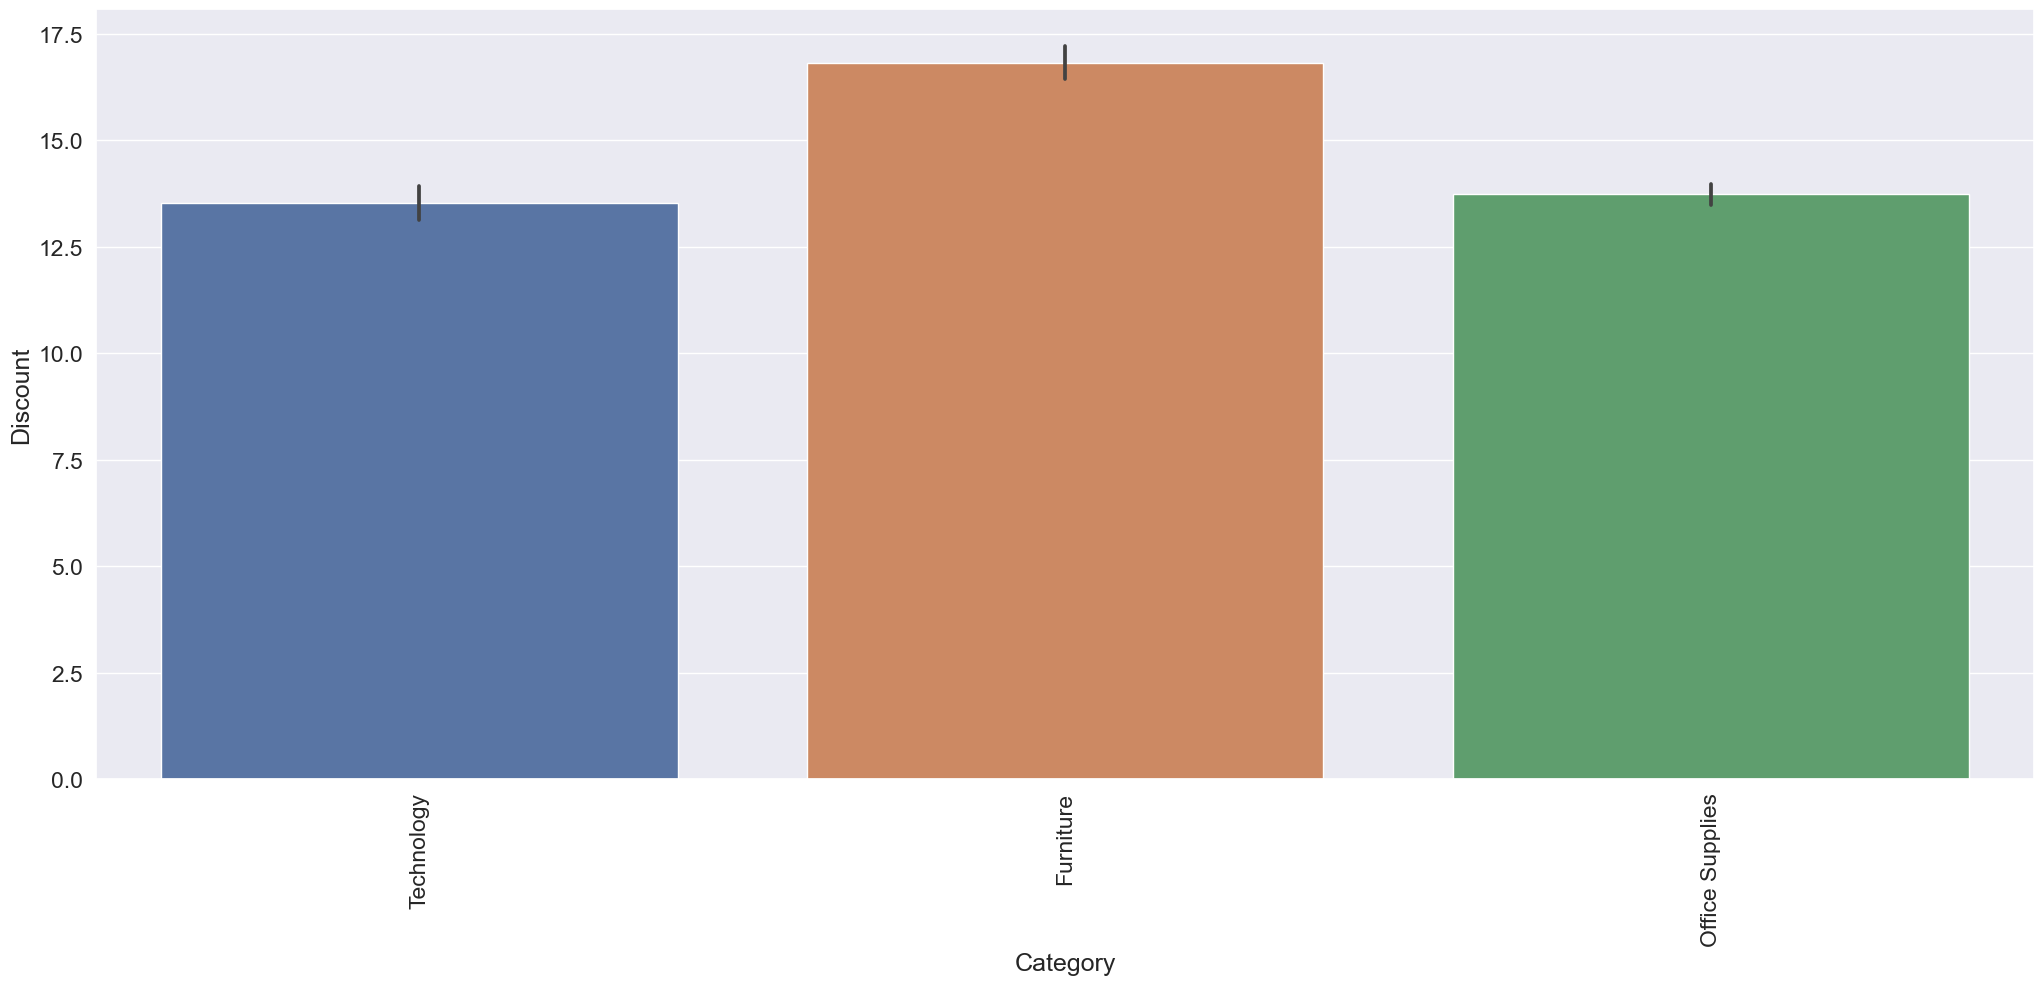

In [37]:
plt.figure(figsize=(25,10))
sns.barplot(df, x='Category', y='Discount')
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
plt.show()

In [38]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_13956\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Sales  Quantity  Discount    Profit  Shipping Cost
Sales          1.000000  0.313577 -0.086722  0.484918       0.768073
Quantity       0.313577  1.000000 -0.019875  0.104365       0.272649
Discount      -0.086722 -0.019875  1.000000 -0.316490      -0.079055
Profit         0.484918  0.104365 -0.316490  1.000000       0.354441
Shipping Cost  0.768073  0.272649 -0.079055  0.354441       1.000000

C:\Users\USER\AppData\Local\Temp\ipykernel_13956\621126171.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

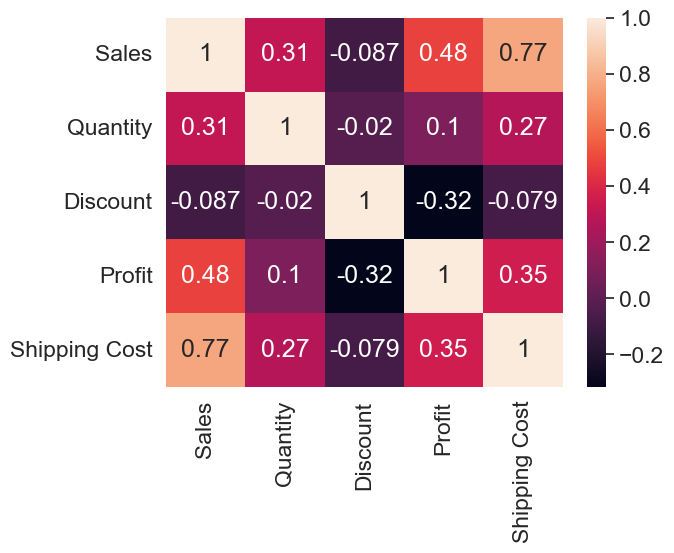

In [40]:
sns.heatmap(df.corr(), annot=True)

<Figure size 1000x1500 with 0 Axes>

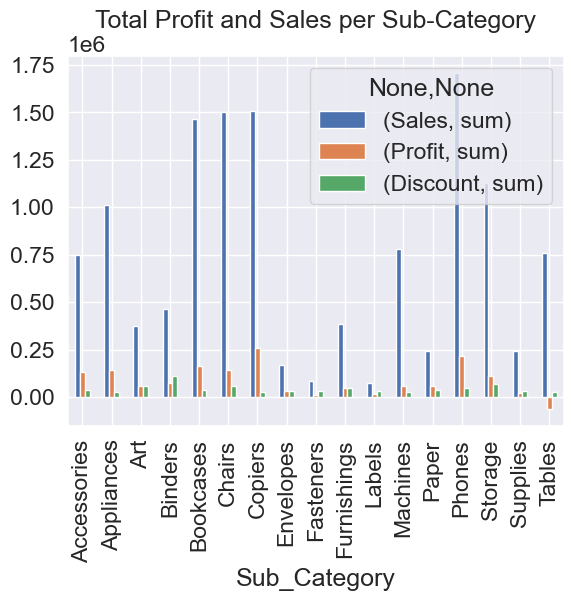

In [42]:
plt.figure(figsize=(10,15))
Profit_sales.agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()